In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as dsets
import torch.nn.functional as F
import torchvision.transforms as transforms

In [5]:
class Net_He(nn.Module):
    def __init__(self, Layers):
        super(Net_He, self).__init__()
        self.hidden = nn.ModuleList()
        
        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity = 'relu')
            self.hidden.append(linear)
            
    def forward(self, x):
        L = len(self.hidden)
        
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L-1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
                
        return x

In [20]:
class Net_Uniform(nn.Module):
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()
        
        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)
            
    def forward(self, x):
        L = len(self.hidden)
        
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L-1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
                
        return(x) 

In [21]:
class Net(nn.Module):
    
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)
        
    def forward(self, x):
        L=len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
                
        return x

In [36]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss': [], 'validation_accuracy': []}
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28*28))
            
            loss = criterion(z, y)
            
            loss.backward()
            optimizer.step()
            
            loss_accuracy['training_loss'].append(loss.data.item())
            
        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28*28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
            
        accuracy = 100 * (correct/len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)
        
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss:.4f} - Accuracy:{accuracy:.2f}%")
        
    return loss_accuracy
            
            

In [37]:
train_dataset = dsets.MNIST(root = './data', train = True, transform = transforms.ToTensor())

In [38]:
validation_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [39]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [40]:
criterion = nn.CrossEntropyLoss()

In [41]:
input_size = 28*28
output_size = 10
learning_rate = 0.01
layers = [input_size, 100, 10, 100, 10, output_size]
epochs = 15

In [42]:
model_net = Net(layers)

model_He = Net_He(layers)

model_Uniform = Net_Uniform(layers)

In [43]:
optimizer_net = torch.optim.SGD(model_net.parameters(), lr = learning_rate)

optimizer_He = torch.optim.SGD(model_He.parameters(), lr = learning_rate)

optimizer_Uniform = torch.optim.SGD(model_Uniform.parameters(), lr = learning_rate)

In [44]:
loss_accuracy_net = train(model_net, criterion, train_loader, validation_loader, optimizer_net, epochs = 15)

loss_accuracy_He = train(model_He, criterion, train_loader, validation_loader, optimizer_He, epochs = 15)

loss_accuracy_Uniform = train(model_Uniform, criterion, train_loader, validation_loader, optimizer_Uniform, epochs = 15)


Epoch [1/15] - Loss: 2.3221 - Accuracy:10.32%
Epoch [2/15] - Loss: 2.3245 - Accuracy:10.32%
Epoch [3/15] - Loss: 2.3110 - Accuracy:10.32%
Epoch [4/15] - Loss: 2.3135 - Accuracy:10.32%
Epoch [5/15] - Loss: 2.3123 - Accuracy:10.32%
Epoch [6/15] - Loss: 2.3167 - Accuracy:10.32%
Epoch [7/15] - Loss: 2.3164 - Accuracy:10.32%
Epoch [8/15] - Loss: 2.3111 - Accuracy:10.32%
Epoch [9/15] - Loss: 2.3085 - Accuracy:10.32%
Epoch [10/15] - Loss: 2.3106 - Accuracy:10.32%
Epoch [11/15] - Loss: 2.3068 - Accuracy:10.32%
Epoch [12/15] - Loss: 2.3049 - Accuracy:10.32%
Epoch [13/15] - Loss: 2.3049 - Accuracy:10.32%
Epoch [14/15] - Loss: 2.3060 - Accuracy:10.32%
Epoch [15/15] - Loss: 2.3069 - Accuracy:10.32%
Epoch [1/15] - Loss: 2.2110 - Accuracy:17.93%
Epoch [2/15] - Loss: 2.0755 - Accuracy:24.98%
Epoch [3/15] - Loss: 1.9053 - Accuracy:33.26%
Epoch [4/15] - Loss: 1.6920 - Accuracy:46.74%
Epoch [5/15] - Loss: 1.4728 - Accuracy:57.13%
Epoch [6/15] - Loss: 1.2692 - Accuracy:63.78%
Epoch [7/15] - Loss: 1.0721 

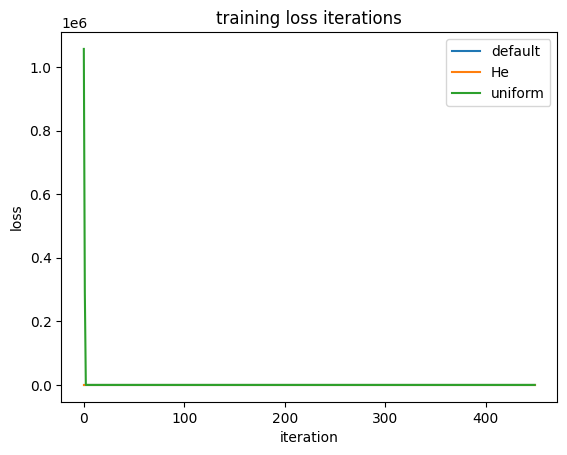

In [51]:
plt.plot(loss_accuracy_net['training_loss'], label = 'default')
plt.plot(loss_accuracy_He['training_loss'], label = 'He')
plt.plot(loss_accuracy_Uniform['training_loss'], label = 'uniform')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

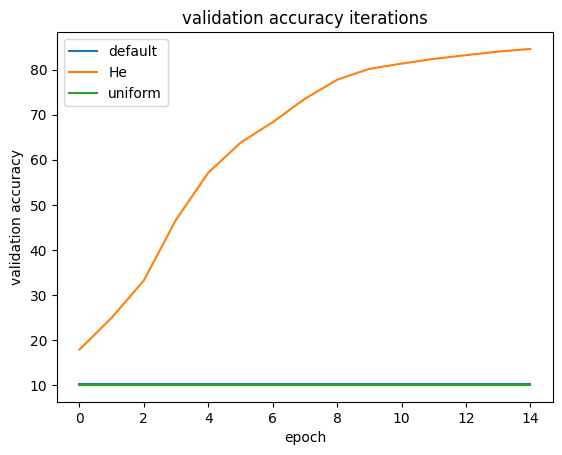

In [47]:
plt.plot(loss_accuracy_net['validation_accuracy'], label = 'default')
plt.plot(loss_accuracy_He['validation_accuracy'], label = 'He')
plt.plot(loss_accuracy_Uniform['validation_accuracy'], label = 'uniform')
plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.title('validation accuracy iterations')
plt.legend()
plt.show()

In [72]:
test_dataset = dsets.MNIST(root='./data', train=False, transform = transforms.ToTensor(), download=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=100, shuffle=False)

In [76]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model_He(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy on the test set: {100 * accuracy:.2f}%')


Accuracy on the test set: 84.57%
